# Mask R-CNN

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io

from pycocotools.coco import COCO

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

## Configuration

In [2]:
import socket_model

config = socket_model.SocketConfig()
SOCKET_DIR = '/Users/wolfsinem/Mask_RCNN/dataset'

## Data

In [3]:
# Load dataset
dataset = socket_model.SocketDataset()
dataset.load_coco(SOCKET_DIR, "train")

dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Image Count: 1972
Class Count: 16
  0. BG                                                
  1. AOP_EVK80                                         
  2. AOP_TRAS1000                                      
  3. AOP_TRAS1000_no_key                               
  4. AOP_X10DER_KT_01                                  
  5. SPLITTER_MCP_03                                   
  6. SPLITTER_POA_01_met_kapje                         
  7. SPLITTER_POA_01_zonder_kapje                      
  8. SPLITTER_POA_01IEC                                
  9. SPLITTER_POA_3_met_kapje                          
 10. SPLITTER_POA_3_zonder_kapje                       
 11. SPLITTER_SQ601_met_kapje                          
 12. SPLITTER_UMU_met_kapje                            
 13. WCD_tweegats                                      
 14. AOP_BTV1                                          
 15. AOP_DIO_01                            

## Annotations 
same as above

In [4]:
annotations_path = "/Users/wolfsinem/Mask_RCNN/dataset/annotations/instances_train2014.json"
coco = COCO(annotations_path)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [5]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

In [6]:
filterClasses = [cats]
catIds = coco.getCatIds(catNms=filterClasses);
imgIds = coco.getImgIds(catIds=catIds);

print("Number of images containing all required classes:", len(imgIds))

Number of images containing all required classes: 2172


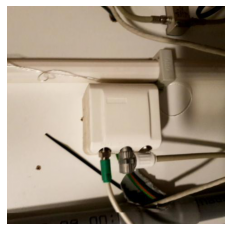

In [7]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread('/Users/wolfsinem/downloads/coco_data/images/{}'.format(img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

In [8]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
# coco.showAnns(anns)

In [11]:
anns

[{'id': 1652,
  'image_id': 1376,
  'category_id': 12,
  'segmentation': [],
  'area': 25265.0,
  'bbox': [176.0, 170.0, 163.0, 155.0],
  'iscrowd': 0,
  'attributes': {'occluded': False}}]

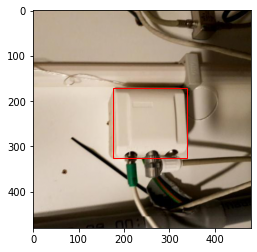

In [9]:
fig,ax = plt.subplots(1)
ax.imshow(I)

for anno in anns:
    rect = patches.Rectangle((anno['bbox'][0],anno['bbox'][1]),
                             anno['bbox'][2],anno['bbox'][3],
                             linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

## Model